Exercise 2

A.

In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [4]:
from google.colab import drive, files
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [5]:
import os
PROJECT_FOLDER = "/content/gdrive/MyDrive/Colab Notebooks"
os.chdir(PROJECT_FOLDER)
print("Current dir: ", os.getcwd())

Current dir:  /content/gdrive/MyDrive/Colab Notebooks


In [6]:
wine_data = pd.read_csv('wine.csv', sep=';')
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavonoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [7]:
wine_data.shape

(178, 14)

In [8]:
from sklearn.preprocessing import StandardScaler

# separating the quantitative predictors from the model of the car (a string)
target = wine_data['target']
quant_df = wine_data[wine_data.columns.difference(['target'])]
quant_df.head()
quant_df.describe()

,alcalinity_of_ash,alcohol,ash,color_intensity,flavonoids,hue,magnesium,malic_acid,nonflavanoid_phenols,od280/od315_of_diluted_wines,proanthocyanins,proline,total_phenols
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,19.494944,13.000618,2.366517,5.058090,2.029270,0.957449,99.741573,2.336348,0.361854,2.611685,1.590899,746.893258,2.295112
std,3.339564,0.811827,0.274344,2.318286,0.998859,0.228572,14.282484,1.117146,0.124453,0.709990,0.572359,314.907474,0.625851
min,10.600000,11.030000,1.360000,1.280000,0.340000,0.480000,70.000000,0.740000,0.130000,1.270000,0.410000,278.000000,0.980000
25%,17.200000,12.362500,2.210000,3.220000,1.205000,0.782500,88.000000,1.602500,0.270000,1.937500,1.250000,500.500000,1.742500
50%,19.500000,13.050000,2.360000,4.690000,2.135000,0.965000,98.000000,1.865000,0.340000,2.780000,1.555000,673.500000,2.355000
75%,21.500000,13.677500,2.557500,6.200000,2.875000,1.120000,107.000000,3.082500,0.437500,3.170000,1.950000,985.000000,2.800000
max,30.000000,14.830000,3.230000,13.000000,5.080000,1.710000,162.000000,5.800000,0.660000,4.000000,3.580000,1680.000000,3.880000


In [9]:
# Standardization
quant_scaled = StandardScaler().fit_transform(quant_df)
wine_df_scaled = pd.DataFrame(quant_scaled, columns=quant_df.columns)

# bringing back the model name
wine_df_scaled['target'] = wine_data['target']
wine_df_scaled.describe()

,alcalinity_of_ash,alcohol,ash,color_intensity,flavonoids,hue,magnesium,malic_acid,nonflavanoid_phenols,od280/od315_of_diluted_wines,proanthocyanins,proline,total_phenols,target
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,178.000000
mean,-3.991813e-17,-8.382808e-16,-8.370333e-16,1.796316e-16,-3.991813e-16,1.995907e-16,-3.991813e-17,-1.197544e-16,3.592632e-16,3.193450e-16,-1.197544e-16,-1.596725e-16,0.000000,1.938202
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,0.775035
min,-2.671018e+00,-2.434235e+00,-3.679162e+00,-1.634288e+00,-1.695971e+00,-2.094732e+00,-2.088255e+00,-1.432983e+00,-1.868234e+00,-1.895054e+00,-2.069034e+00,-1.493188e+00,-2.107246,1.000000
25%,-6.891372e-01,-7.882448e-01,-5.721225e-01,-7.951025e-01,-8.275393e-01,-7.675624e-01,-8.244151e-01,-6.587486e-01,-7.401412e-01,-9.522483e-01,-5.972835e-01,-7.846378e-01,-0.885468,1.000000
50%,1.518295e-03,6.099988e-02,-2.382132e-02,-1.592246e-01,1.061497e-01,3.312687e-02,-1.222817e-01,-4.231120e-01,-1.760948e-01,2.377348e-01,-6.289785e-02,-2.337204e-01,0.095960,2.000000
75%,6.020883e-01,8.361286e-01,6.981085e-01,4.939560e-01,8.490851e-01,7.131644e-01,5.096384e-01,6.697929e-01,6.095413e-01,7.885875e-01,6.291754e-01,7.582494e-01,0.808997,3.000000
max,3.154511e+00,2.259772e+00,3.156325e+00,3.435432e+00,3.062832e+00,3.301694e+00,4.371372e+00,3.109192e+00,2.402403e+00,1.960915e+00,3.485073e+00,2.971473e+00,2.539515,3.000000


In [10]:
from sklearn.decomposition import PCA

# drop again the model predictor
quant_df = wine_df_scaled[wine_df_scaled.columns.difference(['target'])]

# fitting the PCA object onto our dataframe (excluding the model name column)
pca = PCA().fit(quant_df)

# transforming the dataframe - create the new components/ features/ projections
quant_df_pca = pca.transform(quant_df)

print(quant_df.shape)
print(quant_df_pca.shape)

(178, 13)
(178, 13)


B. and C.

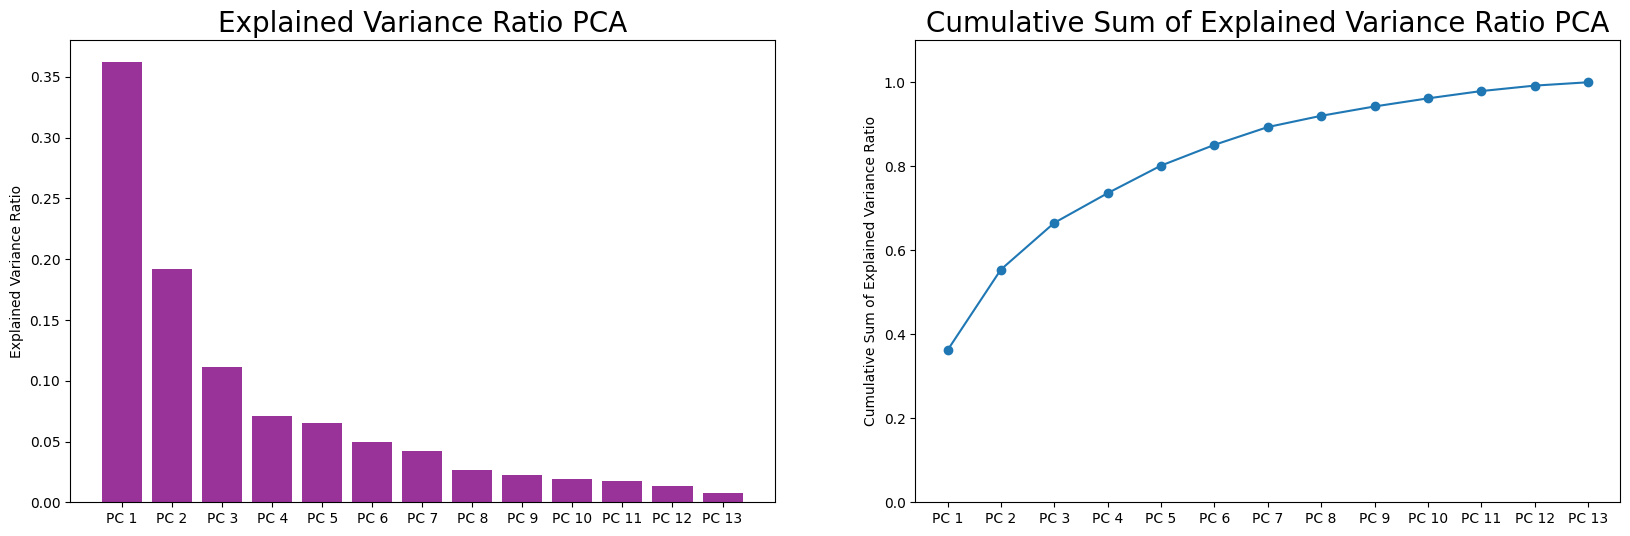

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(20,6))
ax1, ax2 = ax.ravel()

ratio = pca.explained_variance_ratio_
ax1.bar(range(len(ratio)), ratio, color='purple', alpha=0.8)
ax1.set_title('Explained Variance Ratio PCA', fontsize=20)
ax1.set_xticks(range(len(ratio)))
ax1.set_xticklabels(['PC {}'.format(i+1) for i in range(len(ratio))])
ax1.set_ylabel('Explained Variance Ratio')

# ratio[0]=0
ratio = pca.explained_variance_ratio_
ax2.plot(np.cumsum(ratio), 'o-')

ax2.set_title('Cumulative Sum of Explained Variance Ratio PCA', fontsize=20)

ax2.set_ylim(0,1.1)
ax2.set_xticks(range(len(ratio)))
ax2.set_xticklabels(['PC {}'.format(i+1) for i in range(len(ratio))])
ax2.set_ylabel('Cumulative Sum of Explained Variance Ratio');

Exercise 3

In [12]:
soil_data = pd.read_csv('soil_data.csv')
soil_data.head()

,ID,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm
0,1,42.0,38.0,20.0,5.16,0.274,3.78,0.00,14.46,18.61,147,1115,91.32,0.89,27.06,1.77,0.40
1,2,54.0,26.0,20.0,6.07,0.355,1.45,0.00,14.59,32.74,180,1055,60.04,3.66,17.58,1.68,0.41
2,3,28.0,36.0,36.0,6.92,0.675,1.77,0.40,14.91,19.02,183,1215,61.24,3.06,18.00,1.84,0.46
3,4,58.0,20.0,22.0,7.70,0.355,0.72,6.80,4.21,6.28,116,327,19.54,1.64,5.04,0.84,0.50
4,5,33.2,41.2,25.6,7.61,0.392,1.00,4.39,6.11,6.55,228,939,25.84,0.18,7.16,1.22,0.40


In [13]:
soil_data = soil_data.iloc[:, 1:]  # Removes the first column

soil_data.head()
original_row_num = soil_data.shape[0]

In [14]:
original_row_num = soil_data.shape[0]
soil_data_clean = soil_data.dropna()
soil_data_clean.head()
cleaned_row_num = soil_data_clean.shape[0]
num_omitted_rows = original_row_num - cleaned_row_num
print(f"Number of rows omitted: {num_omitted_rows}")

Number of rows omitted: 1


A.

In [15]:
scaler = StandardScaler()
soil_data_scaled = scaler.fit_transform(soil_data_clean)

# Convert back to DataFrame if needed
soil_data_scaled = pd.DataFrame(soil_data_scaled, columns=soil_data.columns)

In [16]:
soil_data_scaled.describe()

,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm
count,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02
mean,-1.821904e-17,8.426308e-17,3.643809e-16,6.923237e-16,3.643809e-17,-3.188333e-17,1.821904e-17,6.376666e-17,-2.732857e-17,1.207012e-16,-1.821904e-17,1.821904e-16,-1.366428e-16,-1.093143e-16,-7.287618e-17,-1.799131e-16
std,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00
min,-1.961270e+00,-2.576741e+00,-2.322921e+00,-2.962554e+00,-1.047470e+00,-2.644466e+00,-1.004766e+00,-1.036270e+00,-8.755067e-01,-1.364553e+00,-1.025000e+00,-1.020918e+00,-8.447584e-01,-8.899095e-01,-7.422487e-01,-1.277649e+00
25%,-6.860194e-01,-6.215226e-01,-6.530750e-01,-5.253166e-01,-3.729956e-01,-6.993503e-01,-8.701789e-01,-5.747351e-01,-5.561940e-01,-6.548279e-01,-6.160731e-01,-6.907849e-01,-5.362724e-01,-6.016396e-01,-3.879417e-01,-6.920431e-01
50%,-1.394835e-01,8.946607e-02,-1.759761e-01,4.624502e-01,-1.596581e-01,-1.094383e-01,-3.501490e-01,-2.498507e-01,-2.989270e-01,-2.125352e-01,-3.418832e-01,-4.366440e-01,-2.865455e-01,-3.803249e-01,-2.250419e-01,-1.514837e-01
75%,6.347758e-01,8.004547e-01,5.396723e-01,7.198852e-01,1.455787e-01,5.482339e-01,6.401882e-01,2.433581e-01,1.472195e-01,3.197589e-01,2.428756e-01,4.534264e-01,1.431315e-01,2.171589e-01,3.967028e-02,4.003374e-01
max,3.504090e+00,2.577926e+00,4.117914e+00,1.189984e+00,1.696150e+01,4.705519e+00,4.797436e+00,9.865003e+00,9.500871e+00,7.039007e+00,5.410042e+00,6.032310e+00,9.423421e+00,1.143445e+01,1.298206e+01,6.830742e+00


B. and C.

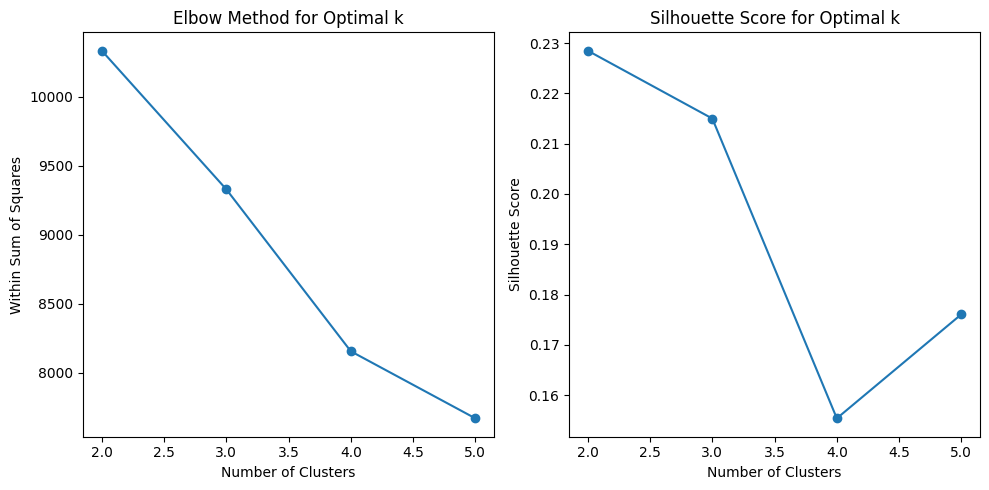

In [28]:

# Generate a synthetic dataset
#X, y = make_blobs(random_state=170, n_samples=600)
X, _ = make_blobs(n_samples=75, centers=4, cluster_std=0.60, random_state=0)

# Initialize lists to store WSS and silhouette scores for different k values
wss = []
silhouette_scores = []

# Loop over k values from 2 to 15 to calculate WSS and silhouette score for each number of clusters
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=0)
    kmeans.fit(soil_data_scaled)

    # Calculate WSS (inertia)
    wss.append(kmeans.inertia_)

    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(soil_data_scaled, kmeans.labels_))

# Plot the WSS against the number of clusters (k) to visualize the elbow method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 6), wss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Sum of Squares')
plt.title('Elbow Method for Optimal k')

# Plot silhouette scores against the number of clusters (k)
plt.subplot(1, 2, 2)
plt.plot(range(2, 6), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

plt.tight_layout()
plt.show()

D.

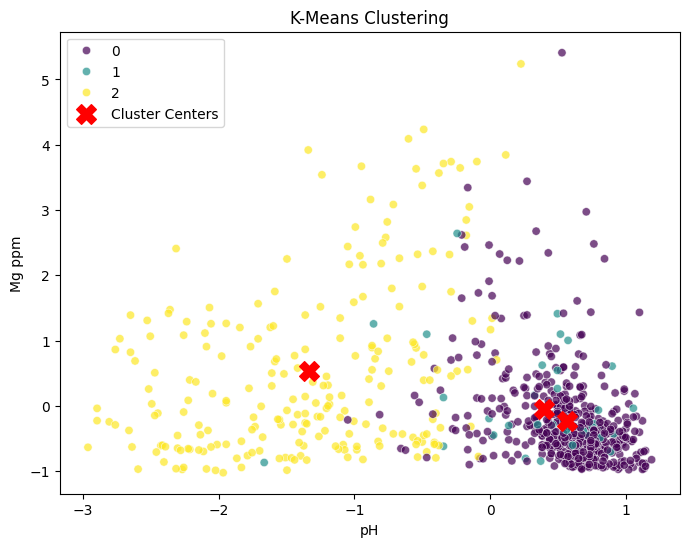

Row 100 is assigned to Cluster 2
Row 101 is assigned to Cluster 0


In [32]:
import seaborn as sns
np.random.seed(123)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(soil_data_scaled)

labels = kmeans.labels_
x_feature = 'pH'
y_feature = 'Mg ppm'

plt.figure(figsize=(8, 6))

# Scatter plot with cluster colors
sns.scatterplot(
    x=soil_data_scaled[x_feature],
    y=soil_data_scaled[y_feature],
    hue=labels,  # Color by cluster
    palette='viridis',
    alpha=0.7
)

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, soil_data.columns.get_loc(x_feature)],
    centers[:, soil_data.columns.get_loc(y_feature)],
    c='red',
    marker='X',
    s=200,
    label='Cluster Centers'
)


plt.title("K-Means Clustering")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend()
plt.show()
cluster_row_100 = labels[100]
print(f"Row 100 is assigned to Cluster {cluster_row_100}")
cluster_row_101 = labels[101]
print(f"Row 101 is assigned to Cluster {cluster_row_101}")

In [18]:
selected_columns = ['Sand %', 'Clay %', 'Silt %', 'pH']
soil_data_selected = soil_data[selected_columns]

In [19]:
scaler = StandardScaler()
soil_data_selected_scaled = scaler.fit_transform(soil_data_selected)

In [20]:
# Apply K-Means clustering on the modified dataset
kmeans_selected = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_selected = kmeans_selected.fit_predict(soil_data_selected_scaled)

# Add cluster labels to DataFrame
soil_data_selected_df = pd.DataFrame(soil_data_selected_scaled, columns=selected_columns)
soil_data_selected_df['Cluster'] = labels_selected

In [21]:
# Calculate Silhouette Score for both clustering approaches
score_original = silhouette_score(soil_data_scaled, kmeans.labels_)
score_selected = silhouette_score(soil_data_selected_scaled, kmeans_selected.labels_)

print(f"Silhouette Score (Original Features): {score_original:.3f}")
print(f"Silhouette Score (Selected 4 Features): {score_selected:.3f}")

Silhouette Score (Original Features): 0.250
Silhouette Score (Selected 4 Features): 0.304
